In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
N = 5 # nombre de lignes (et de colonnes) d'une forme

N_cell = N*N

# états des cellules du réseau (booléens)
etats = [ False for _ in range(N_cell) ]

# seuils des cellules du réseau (réels)
seuils = [ 0.0 for _ in range(N_cell) ]

# poids des connexions du réseau (réels)
poids = [ [ 0.5 for _ in range(N_cell)] for _ in range(N_cell) ]

exemple_a_reconnaitre = [ [True,  False, True,  False, True],
                          [True,  True,  False, False, True],
                          [False, False, True,  False, True],
                          [True,  False, False, True,  True],
                          [True, False, False, False, True] ]

alphabet = \
[ [ [False, True,  True,  True,  False],  # { A }
     [True,  False, False, False, True],
     [True,  True,  True,  True,  True],
     [True,  False, False, False, True],
     [True,  False, False, False, True] ],
   [ [True,  True,  True,  True,  False],  # { B }
     [True,  False, False, False, True],
     [True,  True,  True,  True,  False],
     [True,  False, False, False, True],
     [True,  True,  True,  True,  False] ],
   [ [False, True,  True,  True,  True],   # { C }
     [True,  False, False, False, False],
     [True,  False, False, False, False],
     [True,  False, False, False, False],
     [False, True,  True,  True,  True] ],
   [ [True,  True,  True,  True,  False],  # { D }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  True,  True,  True,  False] ],
   [ [True,  True,  True,  True,  True],   # { E }
     [True,  False, False, False, False],
     [True,  True,  True,  False, False],
     [True,  False, False, False, False],
     [True,  True,  True,  True,  True] ],
   [ [True,  True,  True,  True,  True],   # { F }
     [True,  False, False, False, False],
     [True,  True,  True,  False, False],
     [True,  False, False, False, False],
     [True,  False, False, False, False] ],
   [ [True,  True,  True,  True,  True],   # { G }
     [True,  False, False, False, False],
     [True,  False, False, False, False],
     [True,  False, False, False, True],
     [True,  True,  True,  True,  True] ],
   [ [True,  False, False, False, True],   # { H }
     [True,  False, False, False, True],
     [True,  True,  True,  True,  True],
     [True,  False, False, False, True],
     [True,  False, False, False, True] ],
   [ [False, False, True,  False, False],  # { I }
     [False, False, True,  False, False],
     [False, False, True,  False, False],
     [False, False, True,  False, False],
     [False, False, True,  False, False] ],
   [ [False, False, True,  True,  True],   # { J }
     [False, False, False, True,  False],
     [False, False, False, True,  False],
     [False, False, False, True,  False],
     [True,  True,  True,  True,  False] ],
   [ [True,  False, False, False, True],   # { K }
     [True,  False, False, True,  False],
     [True,  True,  True,  False, False],
     [True,  False, False, True,  False],
     [True,  False, False, False, True] ],
   [ [True,  False, False, False, False],  # { L }
     [True,  False, False, False, False],
     [True,  False, False, False, False],
     [True,  False, False, False, False],
     [True,  True,  True,  True,  True] ],
   [ [True,  True,  False, True,  True],   # { N }
     [True,  False, True,  False, True],
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, False, False, True] ],
   [ [True,  False, False, False, True],   # { M }
     [True,  True,  False, False, True],
     [True,  False, True,  False, True],
     [True,  False, False, True,  True],
     [True,  False, False, False, True] ],
   [ [False, True,  True,  True,  False],  # { O }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [False, True,  True,  True,  False] ],
   [ [True,  True,  True,  True,  False],  # { P }
     [True,  False, False, False, True],
     [True,  True,  True,  True,  False],
     [True,  False, False, False, False],
     [True,  False, False, False, False] ],
   [ [True,  True,  True,  True,  True],   # { Q }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, False, True,  True],
     [True,  True,  True,  True,  True] ],
   [ [True,  True,  True,  True,  False],  # { R }
     [True,  False, False, False, True],
     [True,  True,  True,  True,  False],
     [True,  False, False, True,  False],
     [True,  False, False, False, True] ],
   [ [False, True,  True,  True,  True],   # { S }
     [True,  False, False, False, False],
     [False, True,  True,  True,  False],
     [False, False, False, False, True],
     [True,  True,  True,  True,  False] ],
   [ [True,  True,  True,  True,  True],   # { T }
     [False, False, True,  False, False],
     [False, False, True,  False, False],
     [False, False, True,  False, False],
     [False, False, True,  False, False] ],
   [ [True,  False, False, False, True],   # { U }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [False, True,  True,  True,  False] ],
   [ [True,  False, False, False, True],   # { V }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [False, True,  False, True,  False],
     [False, False, True,  False, False] ],
   [ [True,  False, False, False, True],   # { W }
     [True,  False, False, False, True],
     [True,  False, False, False, True],
     [True,  False, True,  False, True],
     [False, True,  False, True,  False] ],
   [ [True,  False, False, False, True],   # { X }
     [False, True,  False, True,  False],
     [False, False, True,  False, False],
     [False, True,  False, True,  False],
     [True,  False, False, False, True] ],
   [ [True,  False, False, False, True],   # { Y }
     [False, True,  False, True,  False],
     [False, False, True,  False, False],
     [False, False, True,  False, False],
     [False, False, True,  False, False] ],
   [ [True,  True,  True,  True,  True],   # { Z }
     [False, False, False, True,  False],
     [False, False, True,  False, False],
     [False, True,  False, False, False],
     [True,  True,  True,  True,  True] ] ]



In [40]:
#permet d'afficher la lettre écrite
def affiche(lettre):
    box = chr(0x2588) + chr(0x2588)
    for i in range(N):
        for j in range(N):
            if lettre[i][j]:
                print (box, end="")
            else :
                print ("  ", end="")
        print ("")
    print ("")

In [41]:
#
#epsilon pour l'apprentissage
e=0.1
#copie de la liste de poids
poid= list(np.array(poids))
#copie des seuils
seuil= list(np.array(seuils))        

In [42]:
#fonction d'activation
f_activation= lambda x: 0 if x < 0 else 1

In [43]:
#récupérer la config (correspond aux lettres)
config= list(np.array(alphabet[0]).flatten())
#incrémenteur 
i=0
#nombre de modif total
nbr=0
while i< len(config):
    #indice de poids probable à être modifié 
    modif=[]
    #somme des poids actif pour i
    somme=0
    #nombre de noyau actif pour i
    n=0
    for j in range(len(config)):
        if i!=j and config[j]:
            somme+= poid[i][j]
            modif.append(j)
            n+=1
    somme-= seuil[i]
    #erreur 
    erreur= somme
    result= f_activation(somme)
    if result== int(config[i]):
        #print("good")
        i+=1
    else:
        #print("not good")
        nbr+=1
        #quota erreur par poids
        if erreur >0:
            quota=(erreur+e)/(n+1)
        else:
            quota=(erreur-e)/(n+1)
        #modification des poids
        for indice in modif:
            poid[i][indice] -= quota
            poid[indice][i] -= quota
        seuil[i] += quota
        #puis reprendre à zero avec le nouveau poids
        i=0
print(nbr)
    


11


In [44]:
print(poids[1])

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [45]:
print(np.array(poids[1]).reshape(5,5))

[[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]]


In [46]:
#copie de la liste de poids
poid= list(np.array(poids))
#copie des seuils
seuil= list(np.array(seuils)) 
evolution=[]
#condition d'arret de la boucle
stop= False
while not stop:
    nb=0
    for k in range(26):
        #récupérer la config (correspond aux lettres)
        config= list(np.array(alphabet[k]).flatten())
        #incrémenteur 
        i=0
        #nombre de modif total
        nbr=0
        while i< len(config):
            #indice de poids probable à être modifié 
            modif=[]
            #somme des poids actif pour i
            somme=0
            #nombre de noyau actif pour i
            n=0
            for j in range(len(config)):
                if i!=j and config[j]!=False:
                    somme+= poid[i][j]
                    modif.append(j)
                    n+=1
            somme-= seuil[i]
            #print(somme)
            #erreur 
            erreur= somme
            result= f_activation(somme)
            if result== int(config[i]):
                #print("good")
                i+=1
            else:
                #print("not good")
                nbr+=1
                #quota erreur par poids
                if erreur > 0:
                    quota=(erreur+e)/(n+1)
                else:
                    quota=(erreur-e)/(n+1)
                #modification des poids
                for indice in modif:
                    poid[i][indice] -= quota
                    poid[indice][i] -= quota
                seuil[i] += quota
                #puis reprendre à zero avec le nouveau poids
                i=0
        #print(nbr)
        nb+=nbr
    evolution.append(nb)
    #si le nombre d'erreur est nul alors on arrete
    if nb==0:
        stop= True
print(evolution)
    

[204, 85, 64, 50, 51, 36, 29, 30, 29, 27, 24, 17, 13, 16, 13, 14, 17, 11, 7, 7, 6, 8, 8, 9, 8, 3, 12, 11, 6, 7, 7, 12, 4, 6, 1, 0]


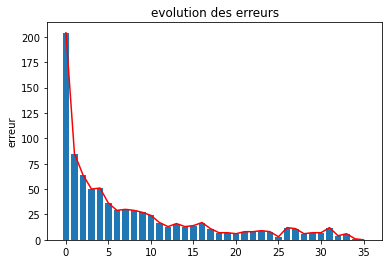

In [52]:
plt.plot(evolution, c="r")
plt.bar([i for i in range(len(evolution))],evolution)
plt.ylabel("erreur")
plt.title("evolution des erreurs")
plt.show()

In [48]:
#print poids final pour tout est
poid

[array([ 0.5       , -0.00189491, -0.47915833, -0.17007065,  0.28188064,
         0.151133  ,  0.33945203,  0.08673528,  0.21037865,  0.28698815,
         0.3007195 ,  0.07610106,  0.27036018, -0.26913008, -0.15757132,
         0.20041394,  0.31311891,  0.28830739,  0.06013446, -0.05658582,
         0.3342738 ,  0.02930173,  0.23668288,  0.03316423, -0.17764589]),
 array([-0.00189491,  0.5       ,  0.38788998,  0.48990745,  0.08055809,
         0.09392202, -0.18236017,  0.19344131, -0.20093389, -0.10633688,
         0.08952626, -0.00934461, -0.09018587, -0.2402511 , -0.01885559,
         0.1121444 ,  0.00795547, -0.18471932, -0.11484808,  0.02784095,
        -0.08014441, -0.01505094,  0.00666789, -0.02160858,  0.14607009]),
 array([-0.47915833,  0.38788998,  0.5       ,  0.49469768, -0.1547397 ,
        -0.02576789, -0.36265251,  0.08563063, -0.19628344, -0.14865827,
        -0.03016365,  0.02905933,  0.31473006,  0.09593755, -0.05225954,
        -0.00754551, -0.20742942, -0.00099633, 

In [49]:
#résultat à obtenir après la formation de l'exemple 

exemple=np.array(exemple_a_reconnaitre).flatten()
print("exemple à reconnaitre: ")
affiche(exemple_a_reconnaitre)

#nombre de modif asynchrone apporté
n=0
#indice des éléments modifiés en asynchrone
liste=[]
#on parcours l'exemple
for i in range(len(exemple)):
    somme=0
    for j in range(len(poid[i])):
        if i!=j:
            somme+= int(exemple[j])*poid[i][j]
    somme-=seuil[i]
    #recupere les resultats de la cellule
    result= f_activation(somme)
    if(result!=exemple[i]):
        n+=1
        liste.append(i)
    #et on fait la convergence en modifiant de facon asynchrone
    exemple[i]=result

print("exemple reconnu: ")
affiche(np.array(exemple).reshape(5,5))

print("nombre de modif asynchrone apporté :",n)
print("indice des éléments modifiés en asynchrone ",liste)


exemple à reconnaitre: 
██  ██  ██
████    ██
    ██  ██
██    ████
██      ██

exemple reconnu: 
██      ██
████    ██
██  ██  ██
██    ████
██      ██

nombre de modif asynchrone apporté : 2
indice des éléments modifiés en asynchrone  [2, 10]
